# **EDA - 1 About - Dataset** 🦖

  **Title: Bike Details Dataset**

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv('BIKE DETAILS.csv')

# Step 3: View first few rows
df.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


1.  What is the range of selling prices in the dataset?

In [ ]:
price_range = df['selling_price'].max() - df['selling_price'].min()
print("Range of Selling Price: ₹", price_range)


Range of Selling Price: ₹ 755000


2. What is the median selling price for bikes in the dataset?

In [ ]:
median_price = df['selling_price'].median()
print("Median Selling Price: ₹", median_price)


Median Selling Price: ₹ 45000.0


3. What is the most common seller type?

In [ ]:
most_common_seller = df['seller_type'].mode()[0]
print("Most Common Seller Type:", most_common_seller)


Most Common Seller Type: Individual


4. How many bikes have driven more than 50,000 kilometers?

In [ ]:
high_km_bikes = df[df['km_driven'] > 50000]
print("Number of bikes with more than 50,000 km driven:", len(high_km_bikes))


Number of bikes with more than 50,000 km driven: 170


5. What is the average km_driven value for each ownership type?

In [ ]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6. What proportion of bikes are from the year 2015 or older?

In [ ]:
old_bikes = df[df['year'] <= 2015]
proportion_old = len(old_bikes) / len(df)
print("Proportion of bikes from 2015 or older: {:.2%}".format(proportion_old))


Proportion of bikes from 2015 or older: 56.64%


7.  What is the trend of missing values across the dataset?

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


8. What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
max_price_index = df['ex_showroom_price'].idxmax()
print("Bike with highest ex_showroom_price:\n", df.loc[max_price_index])


Bike with highest ex_showroom_price:
 name                 Harley-Davidson Street Bob
selling_price                            750000
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                     1278000.0
Name: 134, dtype: object


9. What is the total number of bikes listed by each seller type?

In [ ]:
seller_counts = df['seller_type'].value_counts()
print("Total bikes by seller type:\n", seller_counts)


Total bikes by seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


10. What is the relationship between selling_price and km_driven for first-owner bikes?

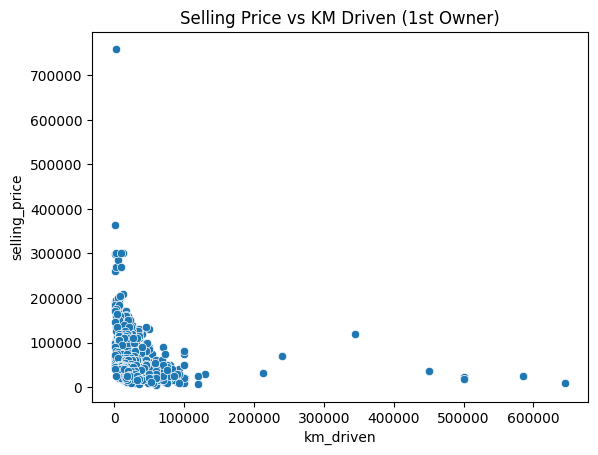

In [ ]:
first_owner_bikes = df[df['owner'] == '1st owner']
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title('Selling Price vs KM Driven (1st Owner)')
plt.show()


11.  Identify and remove outliers in the km_driven column using the IQR method.

In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df['km_driven'] >= Q1 - 1.5*IQR) & (df['km_driven'] <= Q3 + 1.5*IQR)]
print("Original rows:", len(df))
print("Rows after removing outliers:", len(filtered_df))


Original rows: 1061
Rows after removing outliers: 1022


12.  Perform a bivariate analysis to visualize the relationship between year and selling_price.

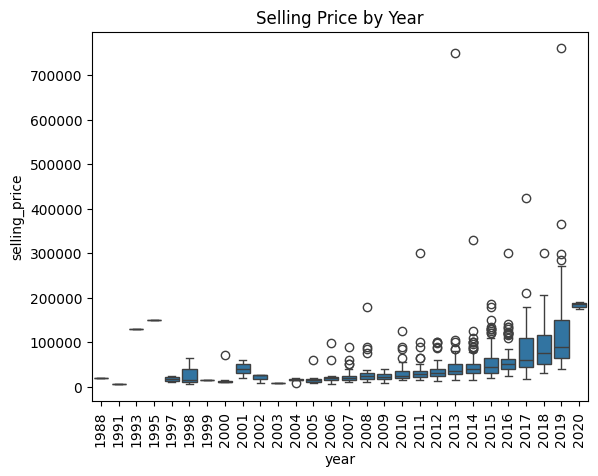

In [ ]:
sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=90)
plt.title('Selling Price by Year')
plt.show()


13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [ ]:
df['age'] = 2025 - df['year']
df['depreciation_per_year'] = df['selling_price'] / df['age']
avg_depreciation = df['depreciation_per_year'].mean()
print("Average depreciation per year: ₹", round(avg_depreciation, 2))


Average depreciation per year: ₹ 7001.3


14. Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
yearly_avg = df.groupby('year')['selling_price'].mean().reset_index()
merged_df = df.merge(yearly_avg, on='year', suffixes=('', '_year_avg'))
above_avg_bikes = merged_df[merged_df['selling_price'] > 1.5 * merged_df['selling_price_year_avg']]
print("Bikes priced significantly above average for their year:\n", above_avg_bikes[['name', 'year', 'selling_price']])


Bikes priced significantly above average for their year:
                                      name  year  selling_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
23                          Jawa Standard  2019         180000
..                                    ...   ...            ...
979             Royal Enfield Thunder 500  2015         105000
981             Royal Enfield Thunder 350  2013         105000
983             Royal Enfield Classic 350  2015         100000
984             Royal Enfield Classic 500  2014          95000
985             Royal Enfield Classic 500  2011          90000

[157 rows x 3 columns]


15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

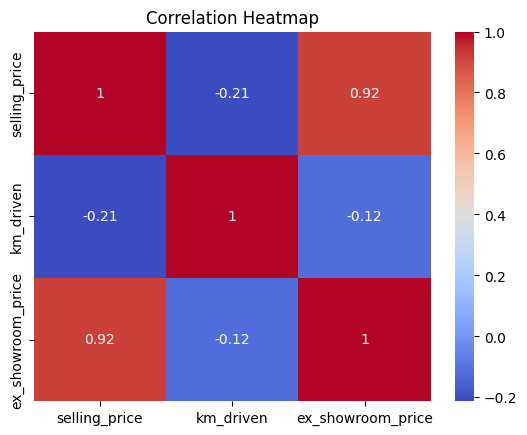

In [ ]:
corr_matrix = df[['selling_price', 'km_driven', 'ex_showroom_price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


---

---

# **EDA - 2**
**About - Dataset: **

---
---

In [ ]:
df = pd.read_csv('Car Sale.csv')

# Step 3: Preview the data
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

Average Price by Dealer:
 Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pa

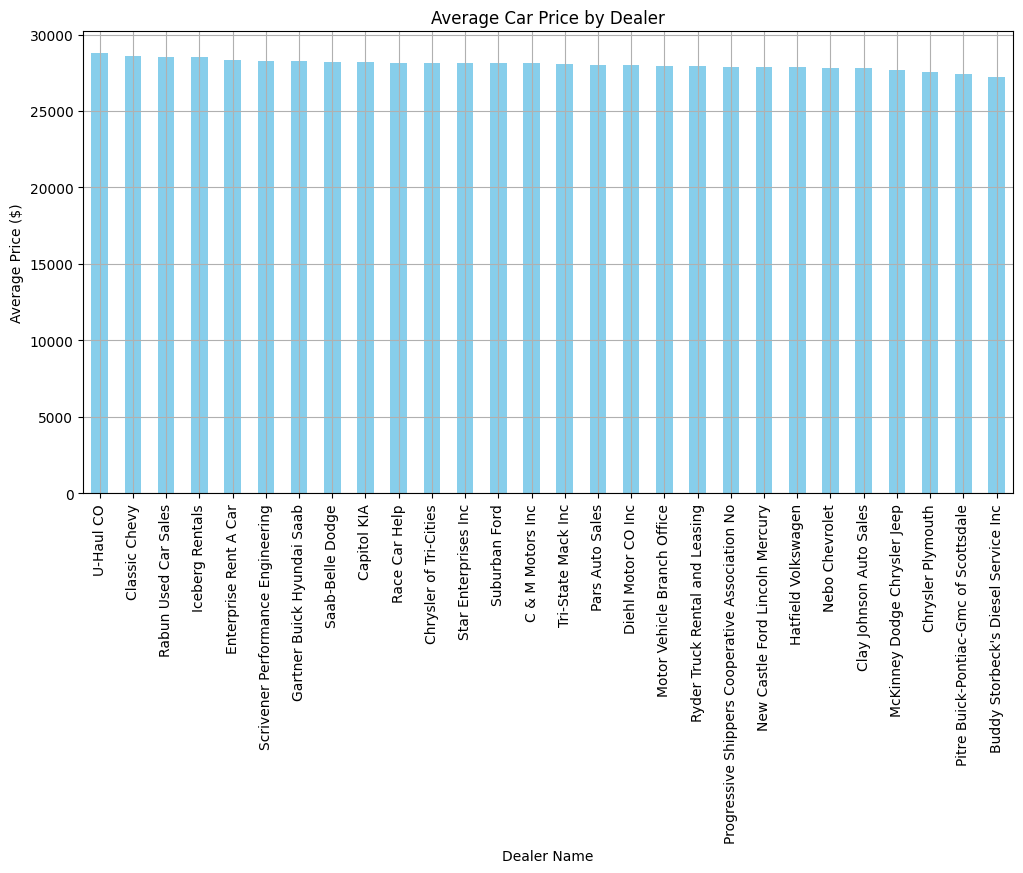

In [ ]:
avg_price_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average Price by Dealer:\n", avg_price_dealer)

avg_price_dealer.plot(kind='bar', figsize=(12, 6), color='skyblue', title='Average Car Price by Dealer')
plt.ylabel("Average Price ($)")
plt.xlabel("Dealer Name")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()



2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [ ]:
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Price Variation by Brand:\n", price_variation)


Price Variation by Brand:
 Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

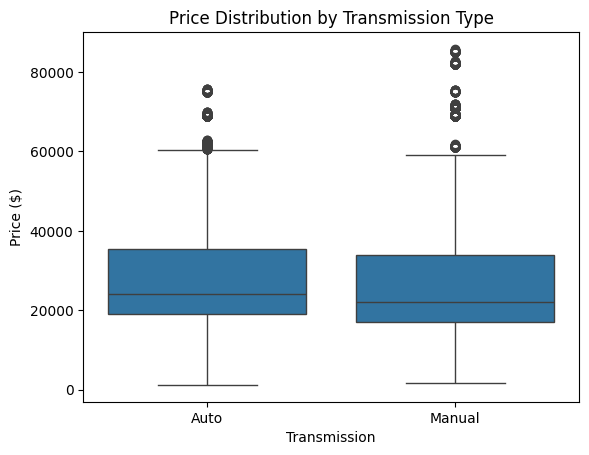

In [ ]:
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title('Price Distribution by Transmission Type')
plt.show()


4.  What is the distribution of car prices across different regions?

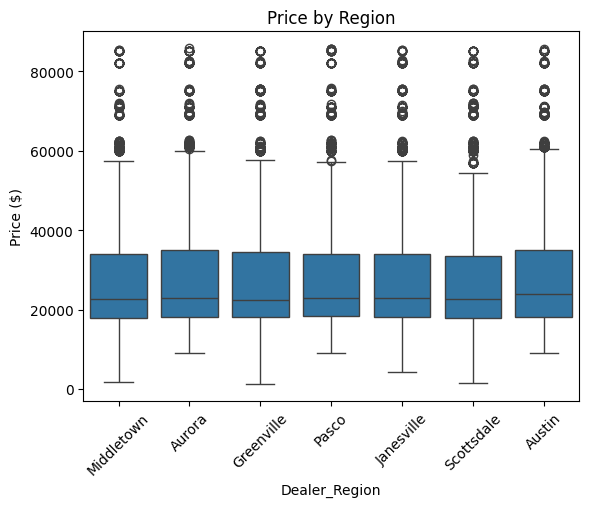

In [ ]:
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title('Price by Region')
plt.xticks(rotation=45)
plt.show()


5. What is the distribution of cars based on body styles?

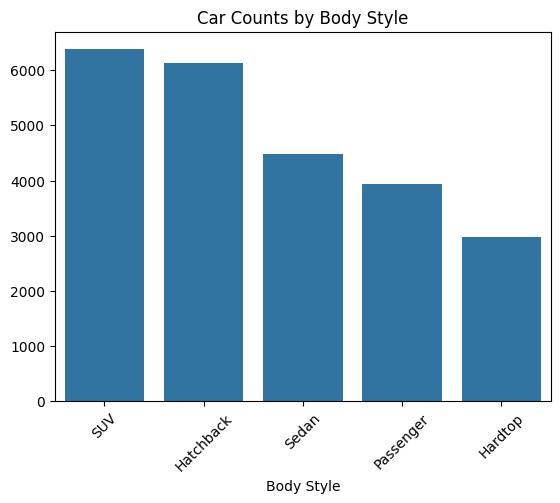

In [ ]:
body_style_counts = df['Body Style'].value_counts()
sns.barplot(x=body_style_counts.index, y=body_style_counts.values)
plt.title('Car Counts by Body Style')
plt.xticks(rotation=45)
plt.show()


6. How does the average selling price of cars vary by customer gender and annual income?

In [ ]:
gender_price = df.groupby('Gender')['Price ($)'].mean()
income_price = df.groupby('Gender')['Annual Income'].mean()
print("Average Price by Gender:\n", gender_price)
print("Average Income by Gender:\n", income_price)


Average Price by Gender:
 Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64
Average Income by Gender:
 Gender
Female    755973.021339
Male      851184.044207
Name: Annual Income, dtype: float64


7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

                       mean  count
Dealer_Region                     
Aurora         28334.626837   3130
Austin         28341.603628   4135
Greenville     28180.819054   3128
Janesville     27833.350955   3821
Middletown     27856.338875   3128
Pasco          28119.039923   3131
Scottsdale     27954.958928   3433


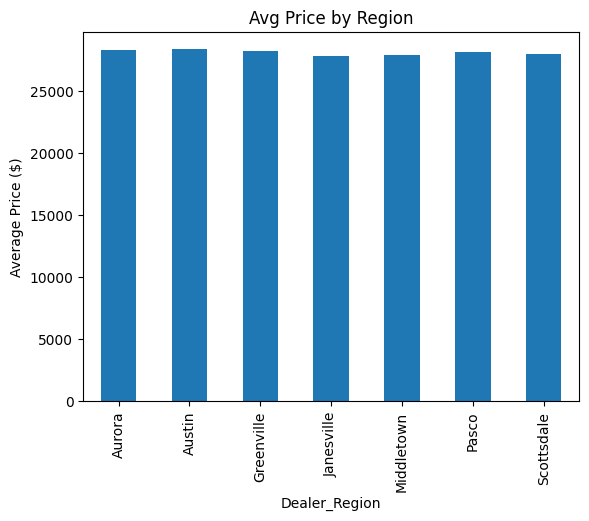

In [ ]:
region_stats = df.groupby('Dealer_Region')['Price ($)'].agg(['mean', 'count'])
print(region_stats)
region_stats['mean'].plot(kind='bar', title='Avg Price by Region')
plt.ylabel("Average Price ($)")
plt.show()


8.  How does the average car price differ between cars with different engine sizes?

In [ ]:
avg_price_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print("Average Price by Engine Type:\n", avg_price_engine)


Average Price by Engine Type:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


9. How do car prices vary based on the customer’s annual income bracket?

<ipython-input-28-c9a477efc6f8>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_bracket_price = df.groupby('Income Bracket')['Price ($)'].mean()


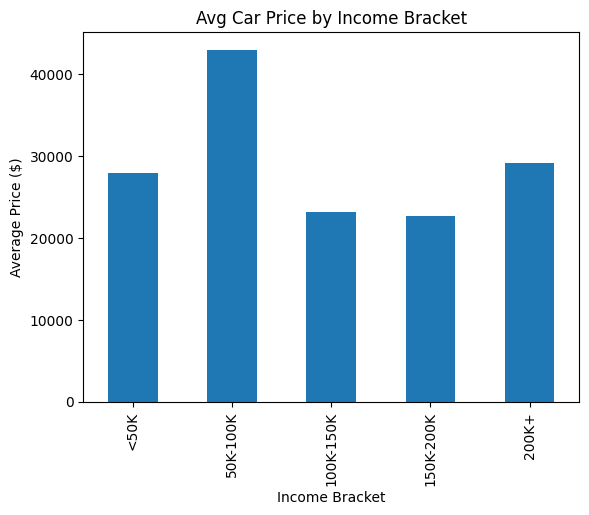

In [ ]:
# Create income brackets
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=[0, 50000, 100000, 150000, 200000, 300000],
                              labels=['<50K', '50K-100K', '100K-150K', '150K-200K', '200K+'])
income_bracket_price = df.groupby('Income Bracket')['Price ($)'].mean()
income_bracket_price.plot(kind='bar', title='Avg Car Price by Income Bracket')
plt.ylabel('Average Price ($)')
plt.show()


10.  What are the top 5 car models with the highest number of sales, and how does their price distribution look?

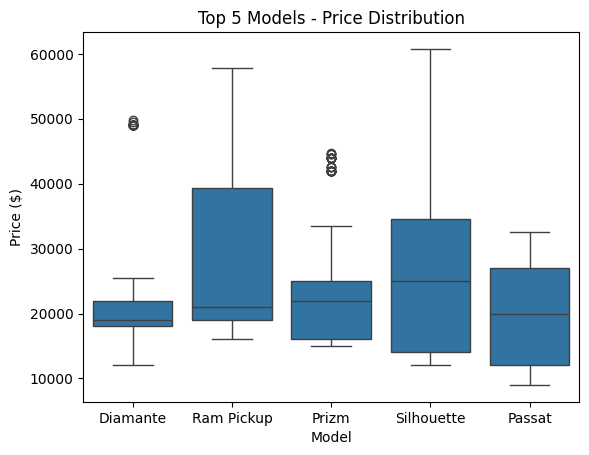

In [ ]:
top_models = df['Model'].value_counts().head(5).index
sns.boxplot(data=df[df['Model'].isin(top_models)], x='Model', y='Price ($)')
plt.title('Top 5 Models - Price Distribution')
plt.show()


11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

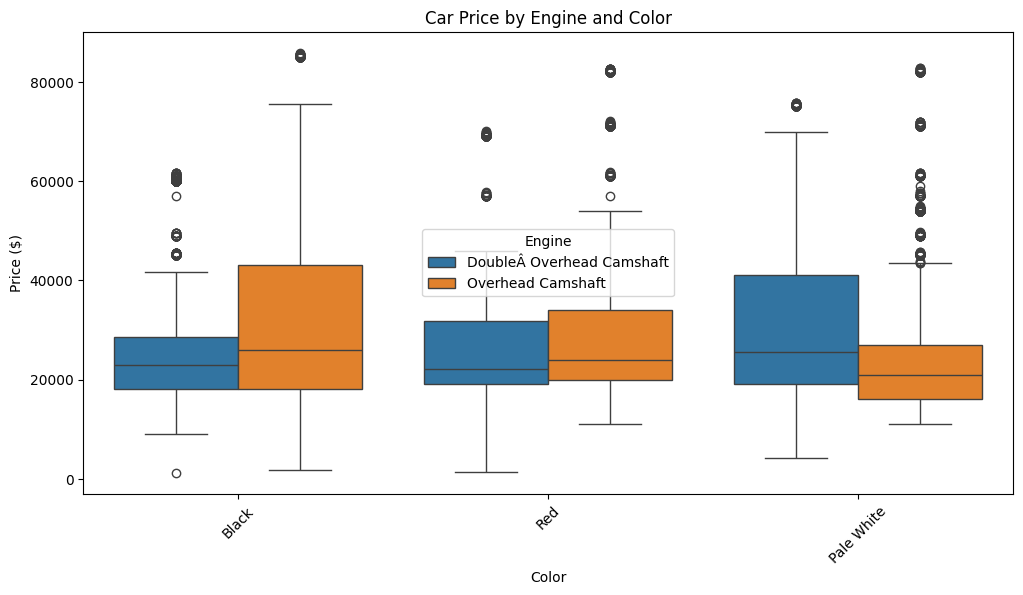

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine')
plt.title('Car Price by Engine and Color')
plt.xticks(rotation=45)
plt.show()


12.  Is there any seasonal trend in car sales based on the date of sale?

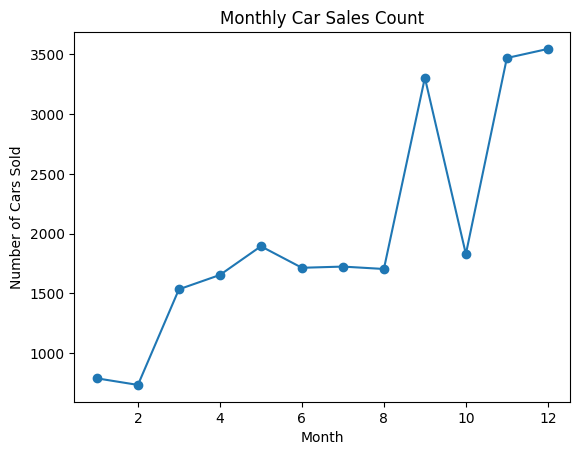

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Price ($)'].count()
monthly_sales.plot(kind='line', marker='o', title='Monthly Car Sales Count')
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.show()


13.  How does the car price distribution change when considering different combinations of body style and
transmission type?

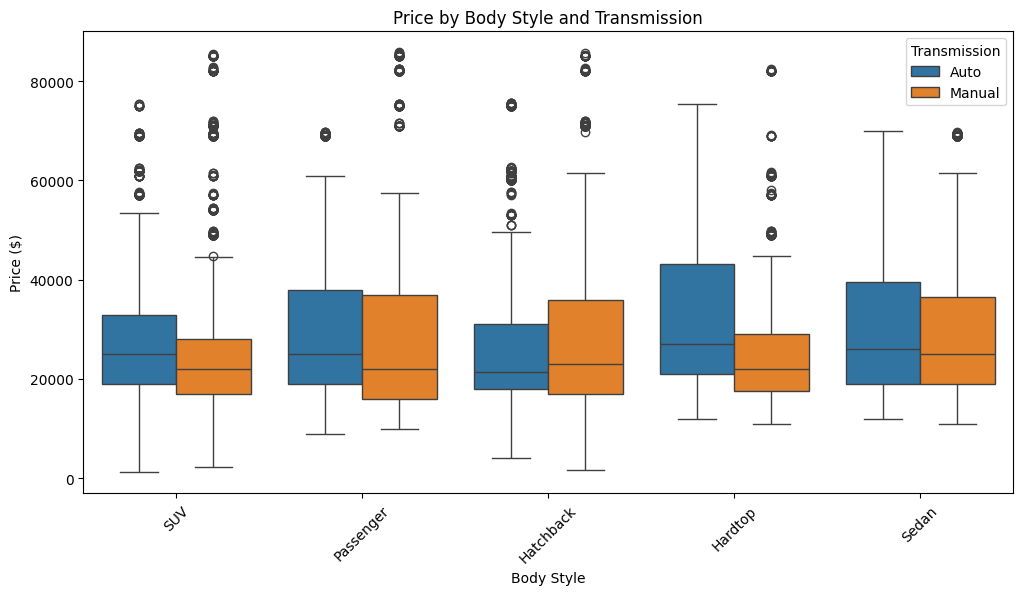

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Price by Body Style and Transmission')
plt.xticks(rotation=45)
plt.show()


14.  What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

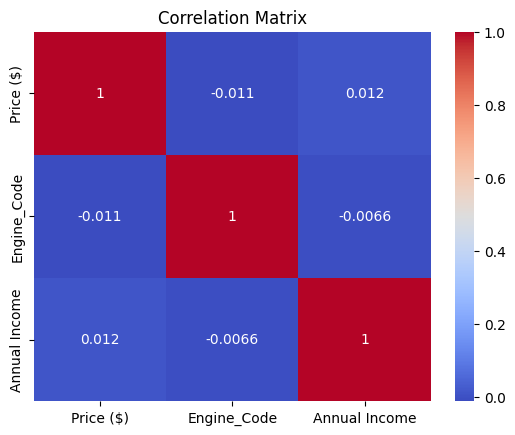

In [ ]:
# Convert engine text to numeric codes for correlation (e.g., V6 = 1, I4 = 2, etc.)
df['Engine_Code'] = df['Engine'].astype('category').cat.codes
correlation_matrix = df[['Price ($)', 'Engine_Code', 'Annual Income']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


 15. How does the average car price vary across different car models and engine types?

In [ ]:
avg_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().sort_values(ascending=False)
print("Avg Price by Model and Engine:\n", avg_model_engine.head(10))


Avg Price by Model and Engine:
 Model        Engine                   
SC           Overhead Camshaft            61074.818182
Ranger       DoubleÂ Overhead Camshaft    61064.055556
Sable        Overhead Camshaft            61039.770833
Catera       DoubleÂ Overhead Camshaft    56836.933333
LX470        Overhead Camshaft            54037.490196
LS400        Overhead Camshaft            53157.941558
GS400        Overhead Camshaft            53086.000000
Tacoma       DoubleÂ Overhead Camshaft    53085.821918
Aurora       Overhead Camshaft            51833.556962
Park Avenue  DoubleÂ Overhead Camshaft    49387.750000
Name: Price ($), dtype: float64


---
---
# **EDA 3: Amazon Sales Dataset**

---
---

In [ ]:
# Load the data
df = pd.read_csv('amazon.csv')

# Show first few rows
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


1. What is the average rating for each product category?

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Convert rating to numeric, replacing non-numeric values with NaN

avg_rating = df.groupby('category', as_index=False)['rating'].mean().sort_values(by='rating', ascending=False)
print(avg_rating)


                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
38             Computers&Accessories|Components|Memory     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
..                                                 ...     ...
3    Computers&Accessories|Accessories&Peripherals|...     3.6
88   Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
2    Computers&Accessories|Accessories&Peripherals|...     3.5
14   Computers&Accessories|Accessories&Peripherals|...     3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


2. What are the top rating_count products by category?

In [ ]:
top_rated = df.sort_values('rating_count', ascending=False).groupby('category').head(1)
top_rated[['category', 'product_name', 'rating_count']]




,category,product_name,rating_count
1279,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",Eureka Forbes car Vac 100 Watts Powerful Sucti...,992.0
750,Electronics|GeneralPurposeBatteries&BatteryCha...,Eveready Red 1012 AAA Batteries - Pack of 10,989.0
1059,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,976.0
823,Computers&Accessories|Accessories&Peripherals|...,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0
1272,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...,959.0
...,...,...,...
1375,"Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...",INKULTURE Stainless_Steel Measuring Cups & Spo...,NaN
1399,"Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...",Cafe JEI French Press Coffee and Tea Maker 600...,NaN
1422,"Home&Kitchen|Heating,Cooling&AirQuality|Parts&...",Monitor AC Stand/Heavy Duty Air Conditioner Ou...,NaN
1439,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|P...",AmazonBasics High Speed 55 Watt Oscillating Pe...,NaN


3.  What is the distribution of discounted prices vs. actual prices?

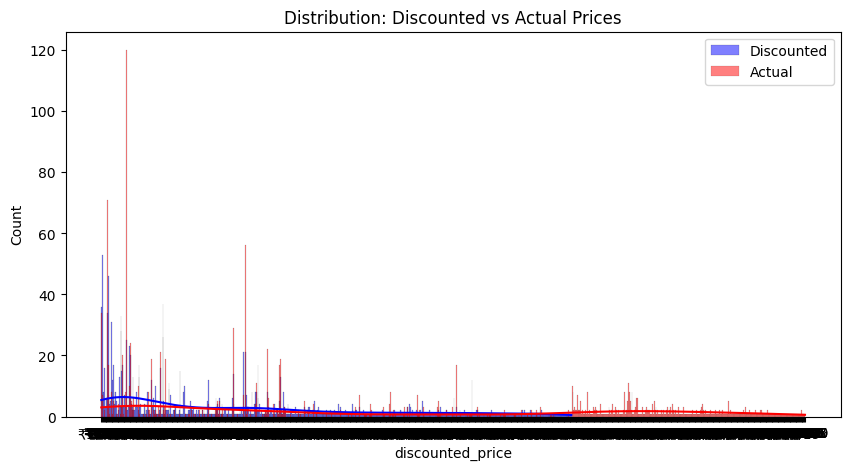

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['discounted_price'], color='blue', label='Discounted', kde=True)
sns.histplot(df['actual_price'], color='red', label='Actual', kde=True)
plt.legend()
plt.title('Distribution: Discounted vs Actual Prices')
plt.show()


4. How does the average discount percentage vary across categories?

In [ ]:
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Calculate the average discount percentage for each category
avg_discount_by_category = df.groupby('category', as_index=False)['discount_percentage'].mean().sort_values(by='discount_percentage', ascending=False)

# Display the results
print(avg_discount_by_category)

                                              category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...                  NaN
1    Computers&Accessories|Accessories&Peripherals|...                  NaN
2    Computers&Accessories|Accessories&Peripherals|...                  NaN
3    Computers&Accessories|Accessories&Peripherals|...                  NaN
4    Computers&Accessories|Accessories&Peripherals|...                  NaN
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                  NaN
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                  NaN
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                  NaN
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                  NaN
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  NaN

[211 rows x 2 columns]


5. What are the most popular product names?

In [ ]:
most_popular_products = df.sort_values(by='rating_count', ascending=False)

# Display the top 10 most popular products
print(most_popular_products[['product_name', 'rating_count']].head(10))

                                           product_name  rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
151   Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...         959.0
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...         942.0
214   Crypo™ Universal Remote Compatible with Tata S...         928.0
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...         925.0


6. What are the most popular product keywords?

In [ ]:
from collections import Counter
import re

# Combine all product names
all_words = ' '.join(df['product_name'].astype(str)).lower()
words = re.findall(r'\b\w+\b', all_words)
common_keywords = Counter(words).most_common(20)
print(common_keywords)


[('with', 752), ('for', 674), ('black', 530), ('usb', 417), ('cable', 414), ('1', 413), ('and', 331), ('c', 289), ('3', 275), ('2', 267), ('charging', 247), ('type', 243), ('to', 219), ('fast', 212), ('in', 178), ('smart', 175), ('white', 170), ('tv', 152), ('compatible', 146), ('5', 137)]


7.  What are the most popular product reviews?

In [ ]:
popular_reviews = df['review_title'].value_counts().head(10)
print(popular_reviews)


review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good pro

8. What is the correlation between discounted_price and rating?

In [ ]:
df = pd.read_csv("amazon.csv")

df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Compute the correlation coefficient
correlation = df[['discounted_price', 'rating']].corr()

print(correlation)

                  discounted_price  rating
discounted_price               NaN     NaN
rating                         NaN     1.0


9. What are the Top 5 categories based on the highest ratings?

In [ ]:
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_categories)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


10. Identify any potential areas for improvement or optimization based on the data analysis.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Average Rating by Category:
 category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Acce

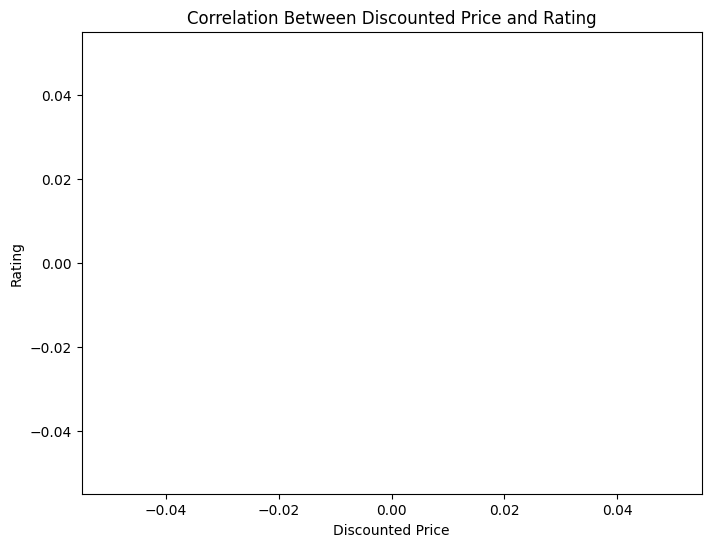

Top 10 Most Popular Products:
                                            product_name  rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
151   Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...         959.0
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...         942.0
214   Crypo™ Universal Remote Compatible with Tata S...         928.0
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...         925.0
Average Discount Percentage by Category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|A

In [ ]:
# Step 1: Install necessary dependencies (if required)
!pip install nltk

# Step 2: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER Lexicon for Sentiment Analysis
nltk.download('vader_lexicon')

# Step 3: Load the Dataset
df = pd.read_csv("amazon.csv")  # Ensure the correct filename

# Step 4: Data Cleaning
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Step 5: Identify Top & Low-Performing Categories
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print("Average Rating by Category:\n", avg_rating_by_category)

# Step 6: Price vs. Rating Trends
plt.figure(figsize=(8,6))
plt.scatter(df['discounted_price'], df['rating'], alpha=0.5, color='blue')
plt.xlabel("Discounted Price")
plt.ylabel("Rating")
plt.title("Correlation Between Discounted Price and Rating")
plt.show()

# Step 7: Most Popular Products
popular_products = df.sort_values(by='rating_count', ascending=False)
print("Top 10 Most Popular Products:\n", popular_products[['product_name', 'rating_count']].head(10))

# Step 8: Discount Effectiveness
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("Average Discount Percentage by Category:\n", avg_discount_by_category)

# Step 9: Demand Forecasting (If timestamp available)
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    monthly_sales = df.groupby(df['timestamp'].dt.to_period("M")).size()
    monthly_sales.plot(kind='line', marker='o', figsize=(10,5))
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.title("Monthly Demand Trend")
    plt.show()

# Step 10: Sentiment Analysis on Reviews (if review data available)
if 'review_text' in df.columns:
    sia = SentimentIntensityAnalyzer()
    df['sentiment_score'] = df['review_text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
    df['sentiment_category'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))
    print("Sentiment Analysis Results:\n", df.groupby('category')['sentiment_category'].value_counts())

# Step 11: Product Return Rate Analysis (if return data available)
if 'returns' in df.columns and 'orders' in df.columns:
    df['return_rate'] = df['returns'] / df['orders']
    print("Products with Highest Return Rate:\n", df[['product_name', 'return_rate']].sort_values(by='return_rate', ascending=False).head(10))

print("\n🎯 Analysis Complete!")


---

# **EDA - 4 for Spotify EDA 4 Assignment**

---

In [12]:
df = pd.read_csv("/spotify.csv")

# Show the first few rows
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

- Check for null values and duplicates

In [13]:
# Check null values
print("Null values:\n", df.isnull().sum())

# Drop rows with nulls (if needed)
df = df.dropna()

# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates (if any)
df = df.drop_duplicates()


Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate rows: 27


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

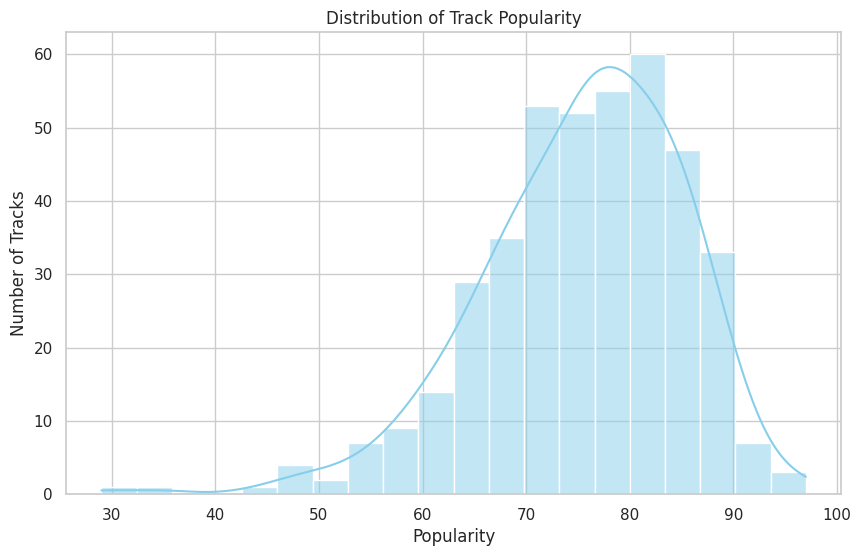

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.show()


3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

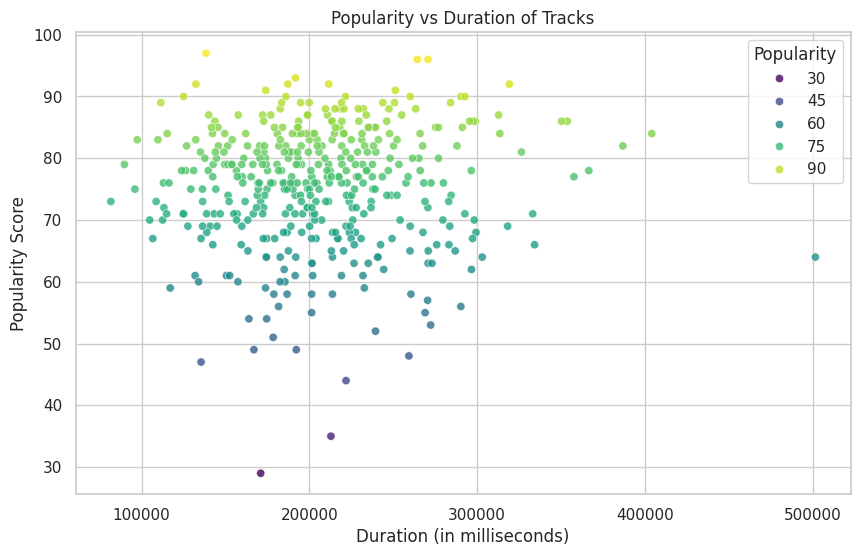

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', hue='Popularity', palette='viridis', alpha=0.8)

plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (in milliseconds)')
plt.ylabel('Popularity Score')
plt.grid(True)
plt.show()


4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot?

🎤 Artist with the Most Tracks: Drake

Top 10 Artists by Number of Tracks:
 Artist
Drake           17
Eminem          11
Lil Nas X       10
JAY-Z           10
21 Savage       10
Flo Rida        10
¥$              10
Timbaland       10
Ludacris        10
Travis Scott     9
Name: count, dtype: int64


<ipython-input-17-fd91b026e603>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y='Artist', order=top_artists, palette='Set2')
<ipython-input-17-fd91b026e603>:15: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


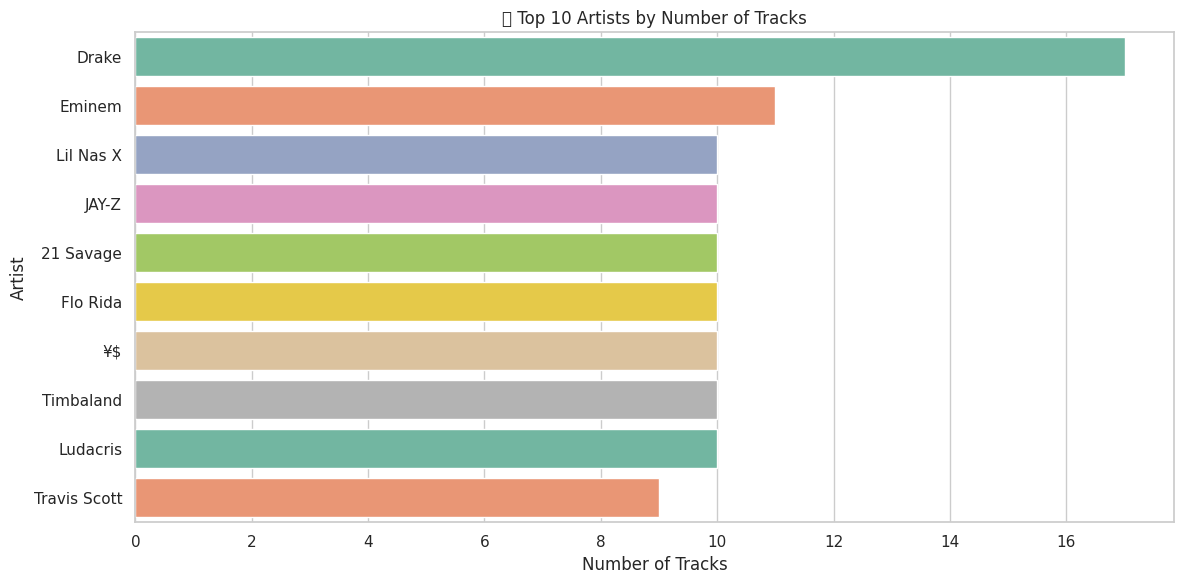

In [17]:
# View the artist with the highest number of tracks
artist_counts = df['Artist'].value_counts()
print("🎤 Artist with the Most Tracks:", artist_counts.idxmax())
print("\nTop 10 Artists by Number of Tracks:\n", artist_counts.head(10))

# Visualize Top 10 Artists with most tracks using countplot
top_artists = artist_counts.head(10).index
filtered_df = df[df['Artist'].isin(top_artists)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, y='Artist', order=top_artists, palette='Set2')
plt.title(' Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

5.  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

In [19]:
# Sort the dataset by Popularity in ascending order
least_popular_tracks = df.sort_values(by='Popularity', ascending=True).head(5)

# Display only the Artist, Track Name, and Popularity
print("Top 5 Least Popular Tracks:\n")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])

Top 5 Least Popular Tracks:

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

In [20]:
#Get top 5 artists by number of tracks
top_5_artists = df['Artist'].value_counts().head(5).index

#Filter the dataframe for only these top artists
top_artists_df = df[df['Artist'].isin(top_5_artists)]

#Group by Artist and calculate average popularity
avg_popularity = top_artists_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

#Display results
print("Average Popularity of Top 5 Most Frequent Artists:\n")
print(avg_popularity)

Average Popularity of Top 5 Most Frequent Artists:

Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [21]:
# Get the top 5 artists by number of tracks
top_5_artists = df['Artist'].value_counts().head(5).index

print(" Most Popular Track for Each of the Top 5 Artists:\n")

# Loop through each artist and get their most popular track
for artist in top_5_artists:
    artist_df = df[df['Artist'] == artist]
    top_track = artist_df.sort_values(by='Popularity', ascending=False).iloc[0]

    print(f" {artist} ➤ '{top_track['Track Name']}' (Popularity: {top_track['Popularity']})")

 Most Popular Track for Each of the Top 5 Artists:

 Drake ➤ 'Rich Baby Daddy (feat. Sexyy Red & SZA)' (Popularity: 92)
 Eminem ➤ 'Without Me' (Popularity: 90)
 Lil Nas X ➤ 'THATS WHAT I WANT' (Popularity: 81)
 JAY-Z ➤ 'Ni**as In Paris' (Popularity: 86)
 21 Savage ➤ 'redrum' (Popularity: 96)


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


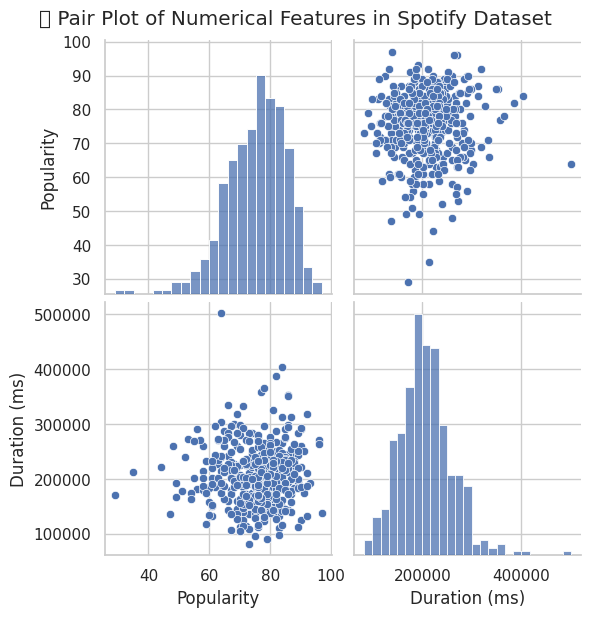

In [22]:
# Select numerical columns only
num_df = df[['Popularity', 'Duration (ms)']]  # Add more if available

# Create pairplot
sns.pairplot(num_df, height=3)
plt.suptitle('🔗 Pair Plot of Numerical Features in Spotify Dataset', y=1.02)
plt.show()

9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.

<ipython-input-23-1e820de56210>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Artist', y='Duration (ms)', palette='Set2')


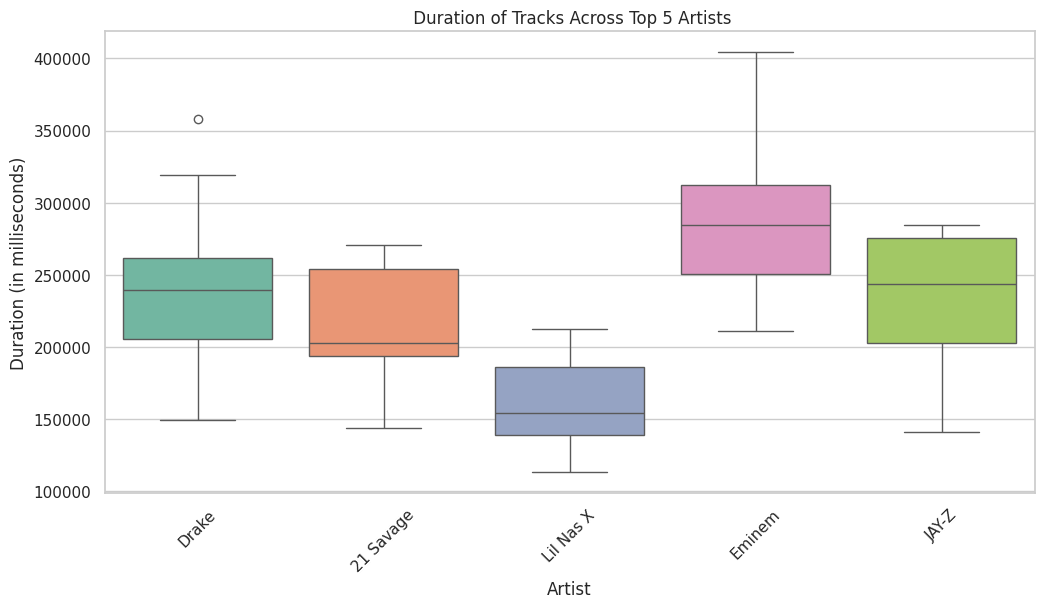

In [23]:
# Get the top 5 artists by track count for clearer visualization
top_artists = df['Artist'].value_counts().head(5).index

#  Filter dataset to include only these top artists
filtered_df = df[df['Artist'].isin(top_artists)]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Artist', y='Duration (ms)', palette='Set2')
plt.title(' Duration of Tracks Across Top 5 Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (in milliseconds)')
plt.xticks(rotation=45)
plt.show()


10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

<ipython-input-24-f057ad1eaf7c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='Artist', y='Popularity', palette='Set2')


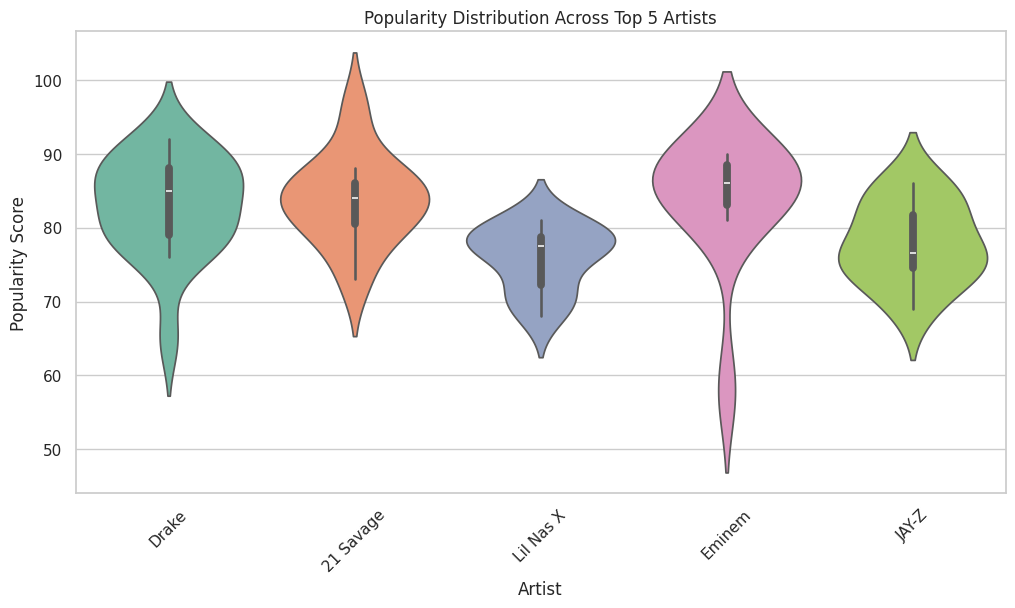

In [24]:
#Choose top 5 most frequent artists for clarity
top_artists = df['Artist'].value_counts().head(5).index

#Filter data for these artists
filtered_df = df[df['Artist'].isin(top_artists)]

#Violin plot for popularity
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='Artist', y='Popularity', palette='Set2')
plt.title('Popularity Distribution Across Top 5 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.show()
